In [187]:
import sys
sys.path.append("../")
from Functions.csv_files.stock import Stock

In [188]:
apple = Stock('AAPL.US', filepath="../Functions/csv_files/")

In [189]:
apple.retrieve_data()

,date,close,volume,3 Month Treasury Yield,WTI Crude Oil Prices,7-day volatility,7-day EWM,7-rsi,7-day slope,14-day volatility,14-day EWM,14-rsi,14-day slope
0,1980-12-12,28.7392,469033600,16.55,NaN,NaN,28.739200,NaN,NaN,NaN,28.739200,NaN,NaN
1,1980-12-15,27.2608,175884800,16.77,NaN,NaN,28.369600,NaN,NaN,NaN,28.542080,NaN,NaN
2,1980-12-16,25.2448,105728000,16.70,NaN,NaN,27.588400,NaN,NaN,NaN,28.102443,NaN,NaN
3,1980-12-17,25.8720,86441600,16.47,NaN,NaN,27.159300,NaN,NaN,NaN,27.805050,NaN,NaN
4,1980-12-18,26.6336,73449600,16.20,NaN,NaN,27.027875,NaN,NaN,NaN,27.648857,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10598,2022-12-23,131.8600,63814900,4.23,79.57,29.533940,134.509237,133.602857,-0.550000,82.490509,137.503068,138.360714,-1.040593
10599,2022-12-27,130.0300,69007800,4.35,79.45,28.367354,133.389428,132.678571,-0.518929,86.712790,136.506659,137.440714,-1.128637
10600,2022-12-28,126.0400,85438400,4.35,78.89,45.654730,131.552071,131.468571,-0.968571,97.436570,135.111104,136.376429,-1.339011
10601,2022-12-29,129.6100,75703700,4.34,78.43,46.363788,131.066553,131.074286,-1.038929,96.866017,134.377624,135.445000,-1.325516


In [191]:
def split(dataframe, window):
  X = []
  y_raw = []
  y_label = []
  dataframe = dataframe.dropna()
  dataframe = dataframe.drop(columns=['date']).reset_index(drop=True)
  L = len(dataframe)
  
  for i in range(0, L):
    if i > (L - window - 1):
      break
    X.append(dataframe[i:(i + window)])
    label = dataframe['close'][i + window]
    last = dataframe['close'][i + window - 1]
    y_raw.append(label)
    if label <= last:
      y_label.append(0)
    else:
      y_label.append(1)
      
  
  return X, y_raw, y_label

In [190]:
apple.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10603 entries, 0 to 10602
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10603 non-null  object 
 1   close                   10603 non-null  float64
 2   volume                  10603 non-null  int64  
 3   3 Month Treasury Yield  10503 non-null  float64
 4   WTI Crude Oil Prices    9293 non-null   float64
 5   7-day volatility        10597 non-null  float64
 6   7-day EWM               10603 non-null  float64
 7   7-rsi                   10597 non-null  float64
 8   7-day slope             10597 non-null  float64
 9   14-day volatility       10590 non-null  float64
 10  14-day EWM              10603 non-null  float64
 11  14-rsi                  10590 non-null  float64
 12  14-day slope            10590 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.1+ MB


In [192]:
X, y_raw, y_label = split(apple.data, 7)

In [193]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, GRU, Conv2D, MaxPool2D, Flatten, Input
import numpy as np

In [194]:
train_X_control = np.array(X)
train_X_control = train_X_control[:,:,0].reshape(-1, 7, 1)
train_y = np.array(y_label)

In [195]:
train_X_control = train_X_control.astype('float32')

In [196]:
train_X_control.shape

(9207, 7, 1)

In [197]:
train_X_control[0]

array([[22.2432],
       [22.3776],
       [22.2432],
       [23.0048],
       [22.8704],
       [22.624 ],
       [22.7584]], dtype=float32)

In [198]:
control_model = Sequential()

control_model.add(LSTM(6, activation='relu', dropout=0.7, input_shape=( 7, 1)))
control_model.add(Dense(4, activation='relu'))
control_model.add(Dense(2, activation='sigmoid'))
control_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

control_history = control_model.fit(train_X_control, train_y, epochs=20, verbose=1, batch_size=32)

Epoch 1/20
288/288 [==============================] - 3s 5ms/step - loss: 1.2268 - acc: 0.4996
Epoch 2/20
288/288 [==============================] - 1s 5ms/step - loss: 0.7114 - acc: 0.5123
Epoch 3/20
288/288 [==============================] - 1s 5ms/step - loss: 0.7205 - acc: 0.5053
Epoch 4/20
288/288 [==============================] - 1s 5ms/step - loss: 0.7082 - acc: 0.5008
Epoch 5/20
288/288 [==============================] - 1s 5ms/step - loss: 0.7038 - acc: 0.5051
Epoch 6/20
288/288 [==============================] - 2s 7ms/step - loss: 0.7054 - acc: 0.5046
Epoch 7/20
288/288 [==============================] - 2s 7ms/step - loss: 0.7003 - acc: 0.5036
Epoch 8/20
288/288 [==============================] - 2s 6ms/step - loss: 0.6986 - acc: 0.5083
Epoch 9/20
288/288 [==============================] - 1s 5ms/step - loss: 0.6986 - acc: 0.4983
Epoch 10/20
288/288 [==============================] - 2s 6ms/step - loss: 0.6964 - acc: 0.4946
Epoch 11/20
288/288 [============================

In [199]:
import lstm_utils

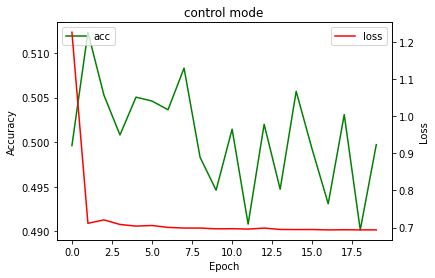

In [200]:
lstm_utils.plot_history(control_history, title="control mode")

In [201]:
train_X = np.array(X)
train_X = train_X.astype('float32')

In [202]:
train_X[0]

array([[2.2243200e+01, 1.1742080e+08, 7.0999999e+00, 2.5559999e+01,
        4.0476499e+00, 2.2025019e+01, 2.2035200e+01, 7.3600002e-02,
        1.3973250e+01, 2.1622824e+01, 2.1633600e+01, 1.5473230e-01],
       [2.2377600e+01, 2.4216640e+08, 7.0700002e+00, 2.6000000e+01,
        4.3474469e+00, 2.2113163e+01, 2.2105600e+01, 8.8799998e-02,
        1.2109805e+01, 2.1723461e+01, 2.1803200e+01, 1.2224000e-01],
       [2.2243200e+01, 1.8504640e+08, 7.0599999e+00, 2.6530001e+01,
        3.5971360e+00, 2.2145672e+01, 2.2176001e+01, 5.2800000e-02,
        8.9803476e+00, 2.1792759e+01, 2.1963200e+01, 7.5470768e-02],
       [2.3004801e+01, 4.7053440e+08, 7.0300002e+00, 2.5850000e+01,
        4.9740105e+00, 2.2360455e+01, 2.2355200e+01, 8.0799997e-02,
        8.5163698e+00, 2.1954365e+01, 2.2115200e+01, 6.9415383e-02],
       [2.2870399e+01, 6.0760000e+08, 7.1700001e+00, 2.5870001e+01,
        5.8660636e+00, 2.2487942e+01, 2.2425600e+01, 1.3920000e-01,
        5.8224359e+00, 2.2076502e+01, 2.2275

In [203]:
train_X.shape

(9207, 7, 12)

In [209]:
model = Sequential()

model.add(LSTM(6, activation='relu', dropout=0.7, input_shape=( 7, 1)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(train_X_control, train_y, epochs=50, verbose=1, batch_size=32)

Epoch 1/50
288/288 [==============================] - 4s 5ms/step - loss: 0.6933 - acc: 0.4936
Epoch 2/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6932 - acc: 0.5006
Epoch 3/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6932 - acc: 0.4952
Epoch 4/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6933 - acc: 0.4949
Epoch 5/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6932 - acc: 0.5027
Epoch 6/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6933 - acc: 0.5008
Epoch 7/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6933 - acc: 0.4927
Epoch 8/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6933 - acc: 0.4939
Epoch 9/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6932 - acc: 0.5028
Epoch 10/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6933 - acc: 0.4902
Epoch 11/50
288/288 [============================

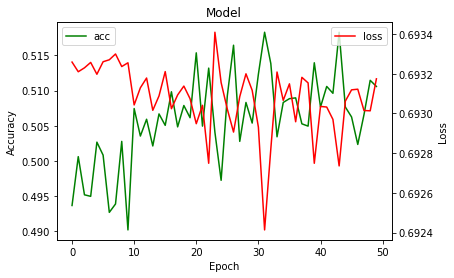

In [210]:
lstm_utils.plot_history(history, "Model")